# Debbuging a broken function

- initialize usefull stuff to work on

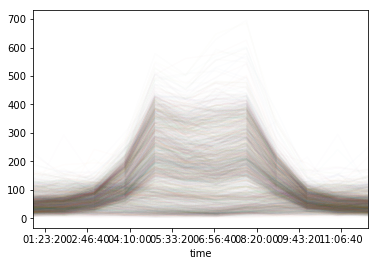

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from jupyterworkflow.data import get_freemont_data

data = get_freemont_data()

pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01)

- figure is not as it was before, there is something going on
- actually the 'pivoted.index' has only 12 hours instead of 24

In [2]:
pivoted.index

Index([01:00:00, 02:00:00, 03:00:00, 04:00:00, 05:00:00, 06:00:00, 07:00:00,
       08:00:00, 09:00:00, 10:00:00, 11:00:00, 12:00:00],
      dtype='object')

- if we look at the data directly, we see the same behaviour, which means our problem started as we imported the data

In [3]:
np.unique(data.index.time)

array([datetime.time(1, 0), datetime.time(2, 0), datetime.time(3, 0),
       datetime.time(4, 0), datetime.time(5, 0), datetime.time(6, 0),
       datetime.time(7, 0), datetime.time(8, 0), datetime.time(9, 0),
       datetime.time(10, 0), datetime.time(11, 0), datetime.time(12, 0)], dtype=object)

- it is actually because the format code we gave to speed-up things. We used '%p' as the local equivalent of 'AM' and 'PM', but we still used '%H' for hours, which is supposed to be 25-hours format. For 12-hours format we should have used '%I' as the raw data shows us.

In [4]:
!head -24 freemont.csv

Date,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
10/03/2012 12:00:00 AM,4,9
10/03/2012 01:00:00 AM,4,6
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,2,3
10/03/2012 04:00:00 AM,6,1
10/03/2012 05:00:00 AM,21,10
10/03/2012 06:00:00 AM,105,50
10/03/2012 07:00:00 AM,257,95
10/03/2012 08:00:00 AM,291,146
10/03/2012 09:00:00 AM,172,104
10/03/2012 10:00:00 AM,72,46
10/03/2012 11:00:00 AM,10,32
10/03/2012 12:00:00 PM,35,41
10/03/2012 01:00:00 PM,42,48
10/03/2012 02:00:00 PM,77,51
10/03/2012 03:00:00 PM,72,92
10/03/2012 04:00:00 PM,133,182
10/03/2012 05:00:00 PM,192,391
10/03/2012 06:00:00 PM,122,258
10/03/2012 07:00:00 PM,59,69
10/03/2012 08:00:00 PM,29,51
10/03/2012 09:00:00 PM,25,38
10/03/2012 10:00:00 PM,24,25


- We have to correct 'data.py' format argument. If we do so and re-run this notebook, things will become normal (so don't do it if you want to keep this example clear!)
- It means our unit-test was uncomplete. We modify the test_data.py file accordingly.